## Problem Statement:

### To identify the strongest predictors of mental health illness & to predict if a person needs mental treatment in the workplace using SageMaker and other AWS services.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

In [3]:
import boto3
import sagemaker
from sagemaker import get_execution_role
s3 = boto3.resource('s3')
# bucket = s3.Bucket('grp5')
# Iterates through all the objects, doing the pagination for you. Each obj
# is an ObjectSummary, so it doesn't contain the body. You'll need to call
# get to get the whole body.

for bucket in s3.buckets.all():
    for obj in bucket.objects.all():
#         key = obj.key
#         body = obj.get()['Body'].read()
        print(bucket.name)
        print(obj.key)

cc-12-mentalhealthsurvey
Data/
cc-12-mentalhealthsurvey
Data/survey.csv
cc-12-mentalhealthsurvey
error.html
cc-12-mentalhealthsurvey
index.html
cc-12-mentalhealthsurvey
mental health.jpg
cc-12-mentalhealthsurvey
style.css
cf-templates-14xjhn6wecfqt-us-east-1
2020113bav-CF_Template.yaml
mentalhealthsurveydatabucket
Data/
mentalhealthsurveydatabucket
Data/result.csv
mentalhealthsurveydatabucket
Data/survey.csv
mentalhealthsurveydatabucket
data/model.tar.gz
mentalhealthsurveydatabucket
error.html
mentalhealthsurveydatabucket
index.html
mentalhealthsurveydatabucket
mental health.jpg
mentalhealthsurveydatabucket
result.csv
mentalhealthsurveydatabucket
style.css


In [4]:
import os

bucket_name = 'cc-12-mentalhealthsurvey'
object_key = 'Data/survey.csv'

path = 's3://{}/{}'.format(bucket_name, object_key)

print(path)


s3://cc-12-mentalhealthsurvey/Data/survey.csv


In [5]:
## Loading data
import pandas as pd

# Load the raw data
df_raw = pd.read_csv(path)
df_raw

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [6]:
##Divide the data into train and test
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and test (20%)
df_raw_train, df_raw_test = train_test_split(df_raw, train_size=0.8, random_state=42)

# Reset the index
df_raw_train, df_raw_test = df_raw_train.reset_index(drop=True), df_raw_test.reset_index(drop=True)

In [7]:
# Make a copy of df_raw_train
df_train = df_raw_train.copy(deep=True)

# Make a copy of df_raw_test
df_test = df_raw_test.copy(deep=True)

# Get the name of the target
target = 'treatment'

In [8]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1007,27


In [9]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,252,27


In [10]:
# Print the first 10 rows of df_train
df_train.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 13:33:32,25,Male,South Africa,NaN,No,No,No,NaN,6-25,...,Somewhat difficult,Maybe,No,Some of them,Yes,No,Yes,No,No,NaN
1,2014-08-27 17:00:15,38,male,United States,VA,No,Yes,Yes,Sometimes,More than 1000,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
2,2014-08-29 05:57:48,26,Female,United Kingdom,NaN,Yes,Yes,Yes,Sometimes,1-5,...,Very easy,Maybe,No,Some of them,Yes,No,Maybe,Yes,No,I am a Trans woman and suffer from depression ...
3,2014-08-27 12:56:56,28,Male,United Kingdom,NaN,No,Yes,Yes,Sometimes,More than 1000,...,Don't know,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No,NaN
4,2014-08-27 13:55:38,30,Male,Ireland,NaN,Yes,No,No,Sometimes,1-5,...,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,No,No,NaN
5,2014-08-27 19:41:28,32,Male,United States,CA,No,No,Yes,Sometimes,More than 1000,...,Somewhat easy,No,No,Yes,Some of them,Maybe,Yes,Don't know,No,NaN
6,2014-08-27 16:25:26,24,Female,United States,CA,Yes,Yes,Yes,Sometimes,1-5,...,Don't know,No,No,Some of them,Some of them,No,No,Don't know,Yes,NaN
7,2014-08-27 16:21:11,28,Female,United States,NY,No,Yes,Yes,Sometimes,26-100,...,Don't know,Yes,Maybe,Some of them,No,No,Maybe,Don't know,No,NaN
8,2014-08-28 10:29:47,37,m,United Kingdom,NaN,No,No,Yes,Often,6-25,...,Don't know,Yes,No,Yes,Yes,Maybe,Yes,No,No,NaN
9,2014-09-20 13:51:05,26,Female,United States,MI,No,Yes,Yes,Rarely,100-500,...,Don't know,Maybe,Maybe,No,No,No,Maybe,No,No,NaN


In [11]:
#Dividing the Training data into Training and Validation
# Divide the training data into training (80%) and validation (20%)
df_train, df_valid = train_test_split(df_train, train_size=0.8, random_state=42)

# Reset the index
df_train, df_valid = df_train.reset_index(drop=True), df_valid.reset_index(drop=True)


In [12]:
#Handling the Identifiers

# Combine df_train, df_valid and df_test
df = pd.concat([df_train, df_valid, df_test], sort=False)

df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

### Identifying the identifiers
The code below shows how to find identifiers from the data.

In [13]:
def id_checker(df):
    """
    The identifier checker

    Parameters
    ----------
    df : dataframe
    
    Returns
    ----------
    The dataframe of identifiers
    """
    
    # Get the identifiers
    df_id = df[[var for var in df.columns 
                if (df[var].dtype != 'float'
                    and df[var].nunique(dropna=True) == df[var].notnull().sum())]]
    
    return df_id

In [14]:
# Call id_checker on df
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

""
0
1
2
3
4


### Removing the Identifiers
The code below shows how to remove the identifiers from data (using pandas DataFrame.drop).

In [15]:
import numpy as np

# Remove the identifiers from df_train
df_train = df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns))

# Remove the identifiers from df_valid
df_valid = df_valid.drop(columns=np.intersect1d(df_id.columns, df_valid.columns))

# Remove the identifiers from df_test
df_test = df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns))

### Combining the training, validation and testing data
The code below shows how to combine the training, validation and testing data (using pandas concat).

In [16]:
# Combine df_train, df_valid and df_test
df = pd.concat([df_train, df_valid, df_test], sort=False)

### Identifying missing values
The code below shows how to find variables with NaN (using pandas DataFrame.isna), their proportion of NaN and 
dtype (data type objects, using pandas Series.dtype).

In [17]:
def nan_checker(df):
    """
    The NaN checker

    Parameters
    ----------
    df : dataframe
    
    Returns
    ----------
    The dataframe of variables with NaN, their proportion of NaN and dtype
    """
    
    # Get the dataframe of variables with NaN, their proportion of NaN and dtype
    df_nan = pd.DataFrame([[var, df[var].isna().sum() / df.shape[0], df[var].dtype]
                           for var in df.columns if df[var].isna().sum() > 0],
                          columns=['var', 'proportion', 'dtype'])
    
    # Sort df_nan in accending order of the proportion of NaN
    df_nan = df_nan.sort_values(by='proportion', ascending=False).reset_index(drop=True)
    
    return df_nan

In [18]:
# Call nan_checker on df
df_nan = nan_checker(df)

# Print df_nan
df_nan

,var,proportion,dtype
0,comments,0.869738,object
1,state,0.409055,object
2,work_interfere,0.209690,object
3,self_employed,0.014297,object


In [19]:
# Print the unique dtype of the variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,object


In [20]:
import numpy as np
# Print df_miss
df_miss = ['Timestamp', 'comments', 'state']

df_train = df_train.drop(df_miss, axis= 1)
df_valid = df_valid.drop(df_miss, axis= 1)
df_test = df_test.drop(df_miss, axis= 1)

In [21]:
# Print the dimension of df_remove_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,805,24


In [22]:
# Print the dimension of df_remove_valid
pd.DataFrame([[df_valid.shape[0], df_valid.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,202,24


In [23]:
# Print the dimension of df_remove_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,252,24


In [24]:
# Combine df_train, df_valid and df_test
df = pd.concat([df_train, df_valid, df_test], sort=False)
pd.DataFrame(df['self_employed'].unique(), columns=['self_employed'])
df['self_employed'] = df['self_employed'].replace(np.nan,'No')
df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
#Removes Age values <18 and >100
df.drop( df[ ( df['Age'] < 18 ) ^ (df['Age'] > 100) ].index , inplace=True)
pd.DataFrame([[df.shape[0], df.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1245,24


In [26]:
pd.DataFrame(df['Gender'].unique(), columns=['Gender'])

,Gender
0,Male
1,m
2,male
3,M
4,Female
5,Make
6,Woman
7,Androgyne
8,female
9,queer


In [27]:
#clean 'Gender'
#Slower case all columm's elements
gender = df['Gender'].str.lower()
#print(gender)

#Select unique elements
gender = df['Gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]


for (row, col) in df.iterrows():

    if str.lower(col.Gender) in male_str:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

In [28]:
pd.DataFrame(df['Gender'].unique(), columns=['Gender'])

,Gender
0,male
1,female
2,trans


In [29]:
newDF = {}

for column in df.columns[0:]:
    if column != 'Age' and column != 'Country':
          data = list(df[column].unique())
          newDF[column] = data
        
newDF

{'Gender': ['male', 'female', 'trans'],
 'self_employed': ['No', 'Yes'],
 'family_history': ['No', 'Yes'],
 'treatment': ['No', 'Yes'],
 'work_interfere': ['Sometimes', nan, 'Never', 'Often', 'Rarely'],
 'no_employees': ['More than 1000',
  '1-5',
  '26-100',
  '6-25',
  '100-500',
  '500-1000'],
 'remote_work': ['Yes', 'No'],
 'tech_company': ['Yes', 'No'],
 'benefits': ['No', "Don't know", 'Yes'],
 'care_options': ['Not sure', 'No', 'Yes'],
 'wellness_program': ['No', "Don't know", 'Yes'],
 'seek_help': ['No', "Don't know", 'Yes'],
 'anonymity': ["Don't know", 'Yes', 'No'],
 'leave': ['Very difficult',
  'Very easy',
  "Don't know",
  'Somewhat easy',
  'Somewhat difficult'],
 'mental_health_consequence': ['Yes', 'Maybe', 'No'],
 'phys_health_consequence': ['Maybe', 'No', 'Yes'],
 'coworkers': ['No', 'Some of them', 'Yes'],
 'supervisor': ['No', 'Yes', 'Some of them'],
 'mental_health_interview': ['No', 'Maybe', 'Yes'],
 'phys_health_interview': ['Maybe', 'Yes', 'No'],
 'mental_vs_ph

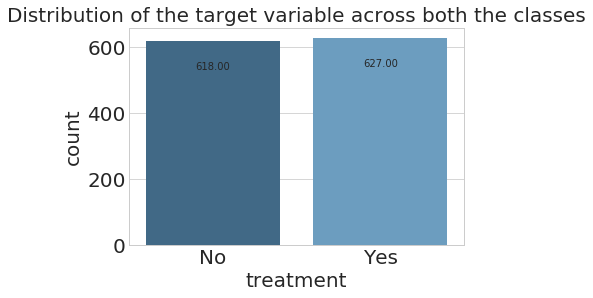

In [30]:
import seaborn as sns
sns.set_style('whitegrid')

# Is data balanced?
ax=sns.countplot(df[target], palette="Blues_d")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, -25), textcoords = 'offset points')

ax.set_title('Distribution of the target variable across both the classes')
ax
fig = ax.get_figure()
fig.savefig("output1.png", bbox_inches="tight")

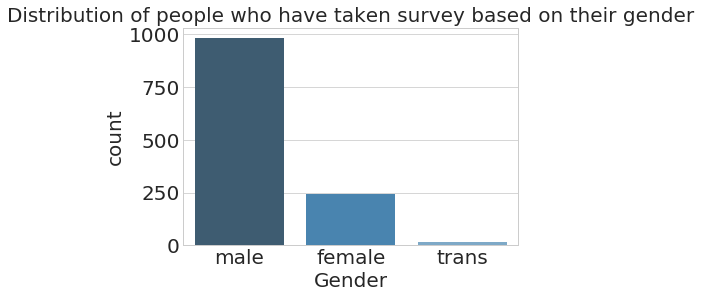

In [31]:
# Count of all three classes 
sns.countplot(df['Gender'], palette="Blues_d").set_title('Distribution of people who have taken survey based on their gender')
fig = ax.get_figure()
fig.savefig("output2.png", bbox_inches="tight")

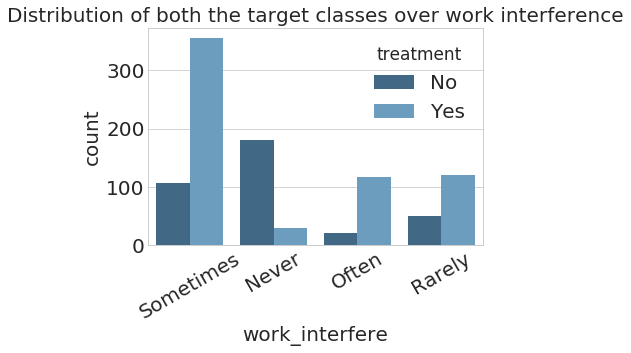

In [32]:
ax = sns.countplot(x = 'work_interfere', data = df,hue=target, palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_title('Distribution of both the target classes over work interference')
fig = ax.get_figure()
fig.savefig("output3.png", bbox_inches="tight")

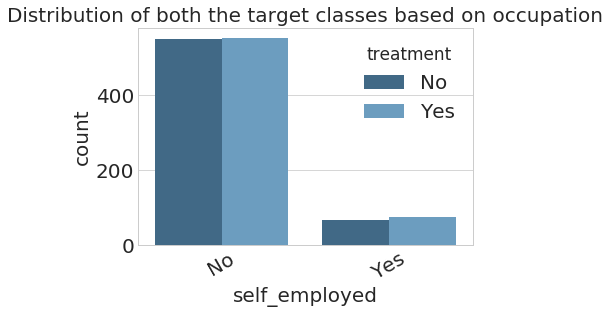

In [33]:
ax = sns.countplot(x = 'self_employed', data = df,hue=target, palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_title('Distribution of both the target classes based on occupation')
fig = ax.get_figure()
fig.savefig("output4.png", bbox_inches="tight")

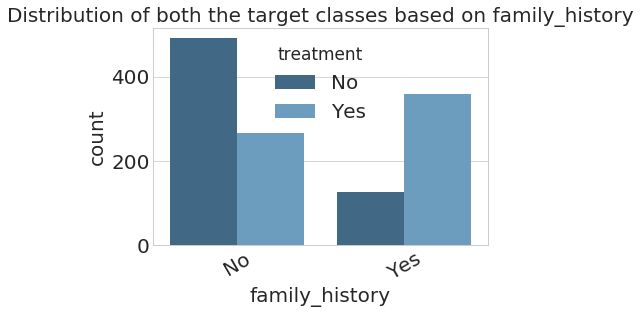

In [34]:
ax = sns.countplot(x = 'family_history', data = df,hue=target, palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_title('Distribution of both the target classes based on family_history')
fig = ax.get_figure()
fig.savefig("output5.png", bbox_inches="tight")

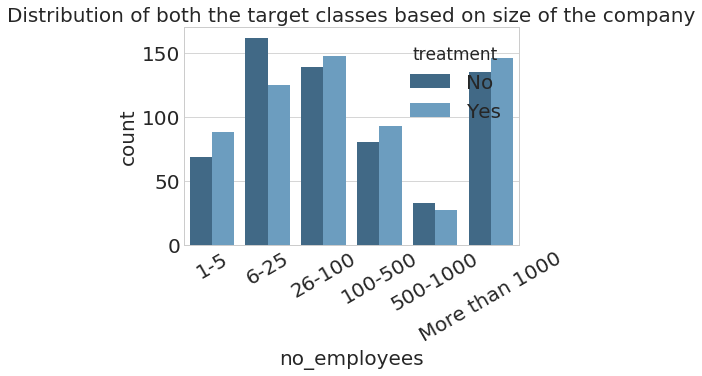

In [35]:
ax = sns.countplot(x = 'no_employees', data = df,hue=target, palette="Blues_d", order = ['1-5','6-25','26-100','100-500','500-1000','More than 1000'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_title('Distribution of both the target classes based on size of the company')
fig = ax.get_figure()
fig.savefig("output6.png", bbox_inches="tight")

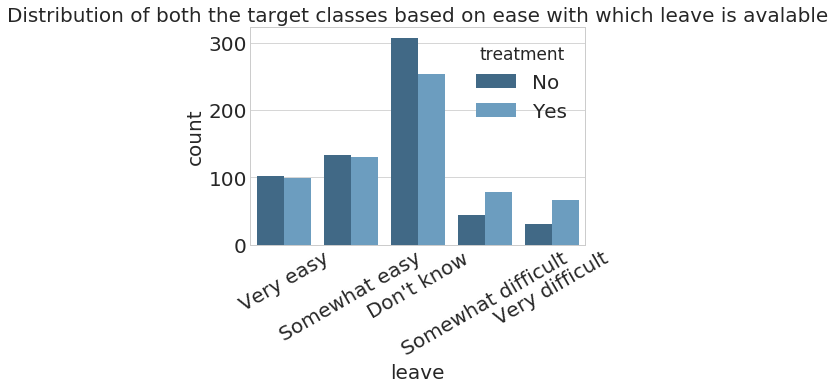

In [36]:
ax = sns.countplot(x = 'leave', data = df,hue=target, palette="Blues_d", order = ['Very easy','Somewhat easy',"Don't know", 'Somewhat difficult','Very difficult'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_title('Distribution of both the target classes based on ease with which leave is avalable')
fig = ax.get_figure()
fig.savefig("output7.png", bbox_inches="tight")

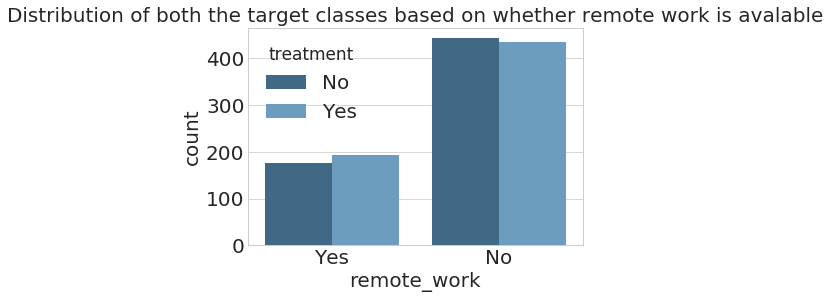

In [37]:
ax = sns.countplot(x = 'remote_work', data = df,hue=target, palette="Blues_d")
# ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_title('Distribution of both the target classes based on whether remote work is avalable')
fig = ax.get_figure()
fig.savefig("output8.png", bbox_inches="tight")

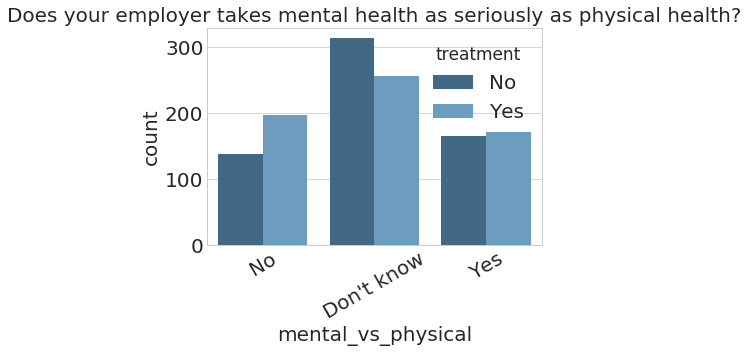

In [38]:
ax = sns.countplot(x = 'mental_vs_physical', data = df,hue=target, palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_title('Does your employer takes mental health as seriously as physical health?')
fig = ax.get_figure()
fig.savefig("output9.png", bbox_inches="tight")

### Identifying the Categorical Variables
The code below shows how to find the categorical variables that have object as dtype (using pandas.Series.dtype).

In [39]:
def cat_var_checker(df):
    """
    The categorical variable checker

    Parameters
    ----------
    df: the dataframe
    
    Returns
    ----------
    The dataframe of categorical variables and their number of unique value
    """
    
    # Get the dataframe of categorical variables and their number of unique value
    df_cat = pd.DataFrame([[var, df[var].nunique(dropna=False)]
                           for var in df.columns if df[var].dtype == 'object'],
                          columns=['var', 'nunique'])
    
    # Sort df_cat in accending order of the number of unique value
    df_cat = df_cat.sort_values(by='nunique', ascending=False).reset_index(drop=True)
    
    return df_cat

In [40]:
# Call cat_var_checker on df
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique
0,Country,46
1,no_employees,6
2,work_interfere,5
3,leave,5
4,Gender,3
5,anonymity,3
6,mental_vs_physical,3
7,phys_health_interview,3
8,mental_health_interview,3
9,supervisor,3


### Encoding the categorical features
The code below shows how to encode the categorical features in the combined data (using pandas.get\_dummies).

In [41]:
# One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(df_cat['var'], [target]))

# Print the first 10 rows (samples) of df
df.head(10)

,Age,treatment,Country_Australia,Country_Austria,Country_Belgium,Country_Bosnia and Herzegovina,Country_Brazil,Country_Bulgaria,Country_Canada,Country_China,...,supervisor_Yes,tech_company_No,tech_company_Yes,wellness_program_Don't know,wellness_program_No,wellness_program_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes
0,43,No,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,43,No,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
2,21,No,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3,29,No,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
4,28,Yes,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
5,41,No,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
6,34,Yes,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
7,29,Yes,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,1,0,0
8,28,No,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
9,25,Yes,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


### Encoding the categorical target
The code below shows how to encode the categorical target in the combined data (using sklearn.LabelEncoder).

In [42]:
from sklearn.preprocessing import LabelEncoder

# The LabelEncoder
le = LabelEncoder()

# Encode the categorical target in the combined data
df[target] = le.fit_transform(df[target].astype(str))

# Print the first 5 rows of df
df.head()

,Age,treatment,Country_Australia,Country_Austria,Country_Belgium,Country_Bosnia and Herzegovina,Country_Brazil,Country_Bulgaria,Country_Canada,Country_China,...,supervisor_Yes,tech_company_No,tech_company_Yes,wellness_program_Don't know,wellness_program_No,wellness_program_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes
0,43,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,43,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
2,21,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3,29,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
4,28,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [43]:
##Divide the data into train and test
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and test (20%)
df_train, df_test = train_test_split(df, train_size=0.8, random_state=42, stratify = df[target])

# Reset the index
df_train, df_test = df_train.reset_index(drop=True), df_test.reset_index(drop=True)

# Divide the training data into training (80%) and test (20%)
df_train, df_valid = train_test_split(df_train, train_size=0.8, random_state=42)

# Reset the index
df_train, df_valid = df_train.reset_index(drop=True), df_valid.reset_index(drop=True)

In [44]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,796,112


In [45]:
# Print the dimension of df_valid
pd.DataFrame([[df_valid.shape[0], df_valid.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,200,112


In [46]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,249,112


## Getting the name of the features

In [47]:
features = np.setdiff1d(df.columns, [target])

In [48]:
index_list = list(df_train.index)

np.random.seed(5)
np.random.shuffle(index_list)

In [49]:
df_train = df_train.iloc[index_list,:]

## Getting the feature matrix and target vector

In [50]:
# Get the feature matrix
X_train = df_train[features].to_numpy()
X_valid = df_valid[features].to_numpy()
X_test = df_test[features].to_numpy()

# Get the target vector
y_train = df_train[target].astype(int).to_numpy()
y_valid = df_valid[target].astype(int).to_numpy()
y_test = df_test[target].astype(int).to_numpy()
y_test1 = df_test[target].astype(int).to_numpy()

## Scaling the data
The code below shows how to standardize the data (using sklearn StandardScaler).

In [51]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_valid = ss.transform(X_valid)

# Standardize the testing data
X_test = ss.transform(X_test)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [52]:
newDF = {}

for column in df.columns[0:]:
    if column != 'Age' and column != 'Country':
          data = list(df[column].unique())
          newDF[column] = data
        
newDF

{'treatment': [0, 1],
 'Country_Australia': [0, 1],
 'Country_Austria': [0, 1],
 'Country_Belgium': [0, 1],
 'Country_Bosnia and Herzegovina': [0, 1],
 'Country_Brazil': [0, 1],
 'Country_Bulgaria': [0, 1],
 'Country_Canada': [0, 1],
 'Country_China': [0, 1],
 'Country_Colombia': [0, 1],
 'Country_Costa Rica': [0, 1],
 'Country_Croatia': [0, 1],
 'Country_Czech Republic': [0, 1],
 'Country_Denmark': [0, 1],
 'Country_Finland': [0, 1],
 'Country_France': [0, 1],
 'Country_Georgia': [0, 1],
 'Country_Germany': [0, 1],
 'Country_Greece': [0, 1],
 'Country_Hungary': [0, 1],
 'Country_India': [0, 1],
 'Country_Ireland': [0, 1],
 'Country_Israel': [0, 1],
 'Country_Italy': [0, 1],
 'Country_Japan': [0, 1],
 'Country_Latvia': [0, 1],
 'Country_Mexico': [0, 1],
 'Country_Moldova': [0, 1],
 'Country_Netherlands': [0, 1],
 'Country_New Zealand': [0, 1],
 'Country_Nigeria': [0, 1],
 'Country_Norway': [0, 1],
 'Country_Philippines': [0, 1],
 'Country_Poland': [0, 1],
 'Country_Portugal': [0, 1],
 

# Hyperparameter Tuning and Model Selection

## Creating the dictionary of the models
- In the dictionary:
    - the key is the acronym of the model
    - the value is the model

In [55]:
!pip install -U xgboost

    100% |████████████████████████████████| 109.8MB 425kB/s eta 0:00:01
Requirement not upgraded as not directly required: scipy in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from xgboost) (1.1.0)
Requirement not upgraded as not directly required: numpy in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from xgboost) (1.14.3)
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier
# import sagemaker.xgboost as XGBClassifier

models = {'lr': LogisticRegression(class_weight='balanced', random_state=42),
          'dtc': DecisionTreeClassifier(class_weight='balanced', random_state=42),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=42),
#           'hgbc': HistGradientBoostingClassifier(random_state=42),
          'xgbc': XGBClassifier(seed=42),
          'mlpc': MLPClassifier(early_stopping=True, random_state=42)}

## Creating the dictionary of the pipelines
In the dictionary:
- the key is the acronym of the model
- the value is the pipeline, which, for now, only includes the model

In [54]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

## Hyperparameter tuning and  model selection using Sklearn (0.22 or above)

### Getting the predefined split cross-validator

In [55]:
from sklearn.model_selection import PredefinedSplit

# Combine the feature matrix in the training and validation data
X_train_valid = np.vstack((X_train, X_valid))

# Combine the target vector in the training and validation data
y_train_valid = np.append(y_train, y_valid)

# Get the indices of training and validation data
train_valid_idxs = np.append(np.full(X_train.shape[0], -1), np.full(X_valid.shape[0], 0))

# The PredefinedSplit
ps = PredefinedSplit(train_valid_idxs)

### Creating the dictionary of the parameter grids
- In the dictionary:
    - the key is the acronym of the model
    - the value is the parameter grid of the model

In [56]:
param_grids = {}

#### The parameter grid for logistic regression
The hyperparameters we want to fine-tune are:
- C
- tol

See details of the meaning of the hyperparametes in [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [57]:
# The grids for C
C_grids = [10 ** i for i in range(-2, 3)]

# The grids for tol
tol_grids = [10 ** i for i in range(-6, -1)]

# Update param_grids
param_grids['lr'] = [{'model__C': C_grids,
                      'model__tol': tol_grids}]

#### The parameter grid for decision tree
The hyperparameters we want to fine-tune are:
- min_samples_split
- min_samples_leaf
- max_depth

See details of the meaning of the hyperparametes in [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [58]:
# The grids for min_samples_split
min_samples_split_grids = [2, 30, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 30, 100]

# The grids for max_depth
max_depth_grids = range(1, 11)

# Update param_grids
param_grids['dtc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids,
                       'model__max_depth': max_depth_grids}]

#### The parameter grid for random forest
The hyperparameters we want to fine-tune are:
- min_samples_split
- min_samples_leaf

See details of the meaning of the hyperparametes in [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [59]:
# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

#### The parameter grid for histogram-based gradient boosting
The hyperparameters we want to fine-tune are:
- learning_rate
- min_samples_leaf

See details of the meaning of the hyperparametes in [sklearn.ensemble.HistGradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html)

In [60]:
# # The grids for learning_rate
# learning_rate_grids = [10 ** i for i in range(-3, 2)]

# # The grids for min_samples_leaf
# min_samples_leaf_grids = [1, 20, 100]

# # Update param_grids
# param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
#                         'model__min_samples_leaf': min_samples_leaf_grids}]

#### The parameter grid for xgboost
The hyperparameters we want to fine-tune are:
- eta
- gamma
- lambda

See details of the meaning of the hyperparametes in [XGBoost Parameters](https://xgboost.readthedocs.io/en/latest/parameter.html)

In [61]:
# The grids for eta
eta_grids = [10 ** i for i in range(-4, 1)]

# The grids for gamma
gamma_grids = [0, 10, 100]

# The grids for lambda
lambda_grids = [10 ** i for i in range(-4, 5)]

# Update param_grids
param_grids['xgbc'] = [{'model__eta': eta_grids,
                        'model__gamma': gamma_grids,
                        'model__lambda': lambda_grids}]

#### The parameter grid for multi-layer perceptron classifier
The hyperparameters we want to fine-tune are:
- alpha
- learning_rate_init

See details of the meaning of the hyperparametes in [sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [62]:
# The grids for alpha
alpha_grids = [10 ** i for i in range(-6, -1)]

# The grids for learning_rate_init
learning_rate_init_grids = [10 ** i for i in range(-5, 0)]

# Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]

### Creating the directory for the cv results.

In [63]:
import os

# Make directory
directory = os.path.dirname('cv_results/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Hyperparameter Tuning
The code below shows how to fine-tune the hyperparameters of the models above (using sklearn GridSearchCV).

In [64]:
# import scipy
# scipy.test()

In [65]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_param_estimator_gs = []

for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_micro',
#                       n_jobs=-1,
                      cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_valid, y_train_valid)
    
    # Update best_score_param_estimator_gs
    best_score_param_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf='cv_results/' + acronym + '.csv', index=False)

### Model Selection

In [66]:
# Sort best_score_param_estimator_gs in descending order of the best_score_
best_score_param_estimator_gs = sorted(best_score_param_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_param_estimator_gs
pd.DataFrame(best_score_param_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

print(best_score_param_estimator_gs[0])

[0.8000000000000002, {'model__eta': 0.1, 'model__gamma': 10, 'model__lambda': 100}, Pipeline(memory=None,
     steps=[('model', XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=10,
       gpu_id=-1, importance_type='gain', interaction_constraints=None,
       lambda=100, learning_rate=0.100000001, max_delta_step=0,
       max_depth..., seed=42,
       subsample=1, tree_method=None, validate_parameters=False,
       verbosity=None))])]


# Plot the Feature Importance

The code below shows how to create the directory for the figures.

In [67]:
import os

# Make directory
directory = os.path.dirname('./figure/')
if not os.path.exists(directory):
    os.makedirs(directory)
print(best_score_param_estimator_gs)

[[0.8000000000000002, {'model__eta': 0.1, 'model__gamma': 10, 'model__lambda': 100}, Pipeline(memory=None,
     steps=[('model', XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=10,
       gpu_id=-1, importance_type='gain', interaction_constraints=None,
       lambda=100, learning_rate=0.100000001, max_delta_step=0,
       max_depth..., seed=42,
       subsample=1, tree_method=None, validate_parameters=False,
       verbosity=None))])], [0.78, {'model__max_depth': 3, 'model__min_samples_leaf': 1, 'model__min_samples_split': 30}, Pipeline(memory=None,
     steps=[('model', DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=30,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter

The code below shows how to get the feature importance detected by random forest.

In [68]:
# Implement me
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_param_estimator_gs[1]

# Implement me
# Get the dataframe of feature and importance
df_fi_rfc = pd.DataFrame(np.hstack((features.reshape(-1, 1), 
                         best_estimator_rfc.steps[0][1].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Implement me
# Sort df_fi_rfc in descending order of the importance
df_fi_rfc = df_fi_rfc.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print df_fi_rfc
print(df_fi_rfc)

                            Features  Importance
0              work_interfere_Rarely    0.336025
1           work_interfere_Sometimes    0.331851
2               work_interfere_Often    0.267543
3                   care_options_Yes   0.0253096
4              Country_United States   0.0169353
5                  family_history_No   0.0144503
6                    care_options_No  0.00788715
7                      coworkers_Yes           0
8             coworkers_Some of them           0
9                no_employees_26-100           0
10              no_employees_100-500           0
11                  no_employees_1-5           0
12            mental_vs_physical_Yes           0
13             mental_vs_physical_No           0
14     mental_vs_physical_Don't know           0
15       mental_health_interview_Yes           0
16        mental_health_interview_No           0
17     mental_health_interview_Maybe           0
18     mental_health_consequence_Yes           0
19      mental_healt

The code below shows how to create the bar plot of feature importance.

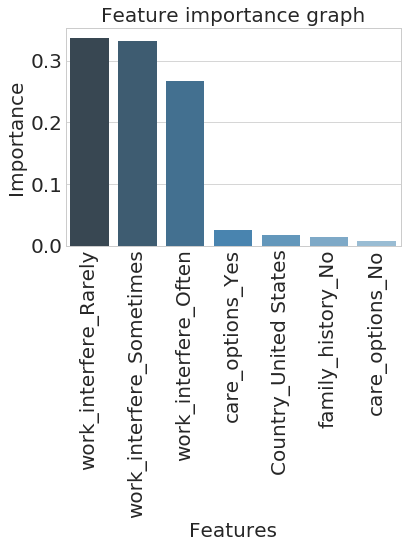

In [69]:
ax = sns.barplot(x = 'Features', y='Importance',  data = df_fi_rfc[:7], palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Feature importance graph')
fig = ax.get_figure()
fig.savefig("output10.png", bbox_inches="tight")

In [70]:
# Get the best_score, best_param and best_estimator obtained by GridSearchCV
best_score_gs, best_param_gs, best_estimator_gs = best_score_param_estimator_gs[0]

# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(X_test)

# print(y_test_pred)
# print(y_test)

#np.count_nonzero(y_test)
#y_test.shape  #249 total, 127 non zero, 122 zeros

#y_train.shape # total 796, 400 zeroes, 396 non zero

### Evaluating Results

87.55020080321285
ROC_AUC :  87.5290322580645
Cohen Kappa:  75.08955368380289


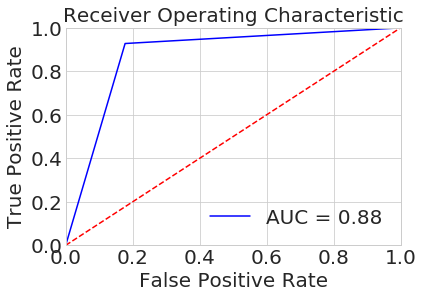

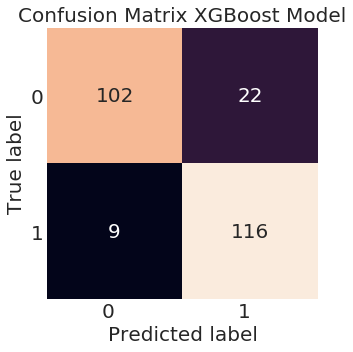

,0,1
0,102,22
1,9,116


In [71]:
from sklearn import metrics
import sklearn.metrics as metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
from sklearn.metrics.classification import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

print(accuracy_score(y_test, y_test_pred)* 100)
print("ROC_AUC : ", roc_auc_score(y_test, y_test_pred) * 100)
print("Cohen Kappa: ", cohen_kappa_score(y_test, y_test_pred)* 100)

# ROC Graph
y_test_pred_score = best_estimator_gs.predict_proba(X_test)
preds = y_test_pred#y_test_pred_score[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_names = df[target].unique()

df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names )

import seaborn as sns
plt.figure(figsize=(5,5))
hm = sns.heatmap(df_cm, cbar=False, annot=True, square=True, fmt='d', annot_kws={'size': 20}, yticklabels=df_cm.columns, xticklabels=df_cm.columns)

hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.title("Confusion Matrix XGBoost Model")
# plt.tight_layout()
plt.show()

(df == 0).sum(axis=1)

df_cm


# Generating the Submission File

In [72]:
# Transform y_test_pred back to the original class
y_test_pred = le.inverse_transform(y_test_pred)
y_test = le.inverse_transform(y_test)

# Get the submission dataframe
df_submit = pd.DataFrame(np.hstack((y_test.reshape(-1, 1), y_test_pred.reshape(-1, 1))),
                         columns=[target, target])                                                                                      

df_submit.columns = ['treatment', 'pred_treatment']


In [76]:
bucket_name = 'cc-12-mentalhealthsurvey'
submission_file = 'result.csv'

df_submit.to_csv(submission_file)
s3 = boto3.resource('s3')
s3.meta.client.upload_file(submission_file, bucket_name, 'Data/result.csv')

os.remove(submission_file)

S3UploadFailedError: Failed to upload result.csv to cc-12-mentalhealthsurvey/Data/result.csv: An error occurred (AccessDenied) when calling the PutObject operation: Access Denied

In [77]:
from sklearn.externals import joblib
import tarfile
sm_boto3 = boto3.client('sagemaker')
sess = sagemaker.Session()
joblib.dump(best_estimator_gs, "best_estimator_gs.joblib")
fileadd = tarfile.open('model.tar.gz','w:gz')
fileadd.add('best_estimator_gs.joblib')
fileadd.close()
#Upload the file to S3 bucket
bucket_s3 = "cc-12-mentalhealthsurvey"
sess.upload_data(path='model.tar.gz', bucket=bucket_s3,)

S3UploadFailedError: Failed to upload model.tar.gz to cc-12-mentalhealthsurvey/data/model.tar.gz: An error occurred (AccessDenied) when calling the PutObject operation: Access Denied

In [641]:
from sagemaker import s3
down_load = s3.S3Downloader()
file = "data/model.tar.gz"
down_load.download("s3://{}/{}".format(bucket_s3,file),".")
tar = tarfile.open("model.tar.gz", "r:gz")
tar.extractall()
tar.close()
best_estimator_gs = joblib.load("best_estimator_gs.joblib")

In [643]:
from sagemaker.amazon.amazon_estimator import get_image_uri
image_name = get_image_uri(boto3.Session().region_name, 'xgboost', '0.90-1')
role = get_execution_role()

In [654]:
s3_model_location = 's3://cc-12-mentalhealthsurvey/data/model.tar.gz'
model = sagemaker.model.Model(model_data = s3_model_location,
                              image = image_name,
                              role = role,
                              sagemaker_session = sess)

In [1]:
#predictor = gs.deploy(initial_instance_count=1, instance_type='ml.t2.medium', endpoint_name = 'xgboost-v2')

In [647]:
y_pred1 = best_estimator_gs.predict(X_test)

In [648]:
y_pred1

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0])

In [74]:
#y_pred2 = predictor.predict(X_test)